In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta

import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as sts

%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

## read data

In [2]:
data=pd.read_csv('qixiangzhan.csv')

In [3]:
data

,STATION,DATE,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
0,54208099999,1956-08-20,53.7,10000,999.9,70.0,52.0,8.0,0.59,1002.8,999.9,969.3,62.0,16.2,4.3
1,54208099999,1956-08-21,51.5,100010,999.9,73.0,50.0,9.9,0.02,1003.1,999.9,969.5,61.7,14.5,5.6
2,54208099999,1956-08-22,54.5,10000,999.9,75.0,48.0,8.0,0.04,1003.8,999.9,970.3,63.0,14.5,4.7
3,54208099999,1956-08-23,45.4,10000,999.9,66.0,45.0,9.9,0.02,1005.7,999.9,970.4,57.5,20.7,6.0
4,54208099999,1956-08-24,40.5,10000,999.9,73.0,43.0,9.9,0.00,1005.9,999.9,971.2,59.3,24.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127479,53195099999,1988-09-08,34.2,0,999.9,67.1,51.1,5.8,0.00,1016.2,999.9,891.3,60.4,17.9,2.4
127480,53195099999,1988-09-09,37.4,0,999.9,68.5,52.0,9.7,0.00,1014.6,999.9,999.9,61.5,18.6,6.3
127481,53195099999,1988-09-10,37.2,0,999.9,71.2,49.5,5.8,0.00,1012.6,999.9,888.8,62.5,18.6,2.9
127482,53195099999,1988-09-11,33.5,0,999.9,75.0,47.8,5.8,0.00,1012.0,999.9,888.9,66.0,18.6,3.4


|变量名|描述|
|--|--|
|DATE|某天的日期|
|STATION|气象站ID|
|YEARMODA|年月日|
|TEMP|气温|
|DEWP|露点|
|SLP|海平面气压|
|STP|本站气压|
|VISIB|能见度|
|WDSP|风向风速|
|MXSPD|最大风速|
|GUST|阵风|
|MAX|最大|
|MIN|最小|
|PRCP|降水量|
|SNDP|雪深|
|FRSHTT|标志当天是否发生|

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127484 entries, 0 to 127483
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   STATION  127484 non-null  int64  
 1   DATE     127484 non-null  object 
 2   DEWP     127484 non-null  float64
 3   FRSHTT   127484 non-null  int64  
 4   GUST     127484 non-null  float64
 5   MAX      127484 non-null  float64
 6   MIN      127484 non-null  float64
 7   MXSPD    127484 non-null  float64
 8   PRCP     127484 non-null  float64
 9   SLP      127484 non-null  float64
 10  SNDP     127484 non-null  float64
 11  STP      127484 non-null  float64
 12  TEMP     127484 non-null  float64
 13  VISIB    127484 non-null  float64
 14  WDSP     127484 non-null  float64
dtypes: float64(12), int64(2), object(1)
memory usage: 14.6+ MB


In [5]:
data.describe()

,STATION,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
count,1.274840e+05,127484.000000,127484.000000,127484.000000,127484.000000,127484.000000,127484.000000,127484.000000,127484.000000,127484.000000,127484.000000,127484.000000,127484.000000,127484.000000
mean,5.405853e+10,44.252608,2885.330983,960.482675,53.672935,30.527386,17.171617,1.371701,1163.089031,997.042074,940.933912,41.514458,20.065051,7.604297
std,3.555256e+08,462.679515,10470.953354,191.349303,82.420180,144.261822,78.477492,11.422220,1131.166389,53.335304,107.288504,23.560604,58.452244,43.419825
min,5.319510e+10,-39.600000,0.000000,9.700000,-22.500000,-41.800000,1.900000,0.000000,984.100000,0.400000,0.200000,-26.700000,0.100000,0.000000
25%,5.411510e+10,2.100000,0.000000,999.900000,32.500000,8.400000,7.800000,0.000000,1008.700000,999.900000,887.100000,21.000000,14.600000,3.200000
50%,5.420810e+10,20.500000,0.000000,999.900000,56.500000,30.000000,9.700000,0.000000,1018.000000,999.900000,974.300000,44.200000,17.800000,5.000000
75%,5.430810e+10,45.100000,1000.000000,999.900000,74.300000,49.500000,13.600000,0.000000,1027.800000,999.900000,999.900000,62.700000,18.600000,7.500000
max,5.431110e+10,9999.900000,111000.000000,999.900000,9999.900000,9999.900000,999.900000,99.990000,9999.900000,999.900000,999.900000,89.800000,999.900000,999.900000


## Processing

In [6]:
data.drop('GUST',axis=1,inplace=True)
data.drop('SNDP',axis=1,inplace=True)

fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (40, 20))
for ax, column in zip(axes.flatten(), df.iloc[:,2:].columns):
    sns.distplot(df[column], ax = ax, color = 'darkred')
    ax.set_title(column, fontsize = 43)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 35)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 35)
    ax.set_xlabel('')
fig.tight_layout(rect = [0, 0.03, 1, 0.95])

## groupby

def jh(data,column):    
    df=data[data['STATION']==column]
    df.replace([9999.9,999.9,99.9,99.99],np.nan,inplace=True)
    df.drop('FRSHTT',axis=1,inplace=True)
    df.fillna(method='ffill',inplace=True)
    df.fillna(method='bfill',inplace=True)
    df.loc[:,'DATE']=df.loc[:,'DATE'].apply(pd.to_datetime)
    for i in df.index:
        df.loc[i,'DATE']=df.loc[i,'DATE'].strftime('%Y')
    grp1=df.groupby('DATE').mean()
    return grp1

In [7]:
def jh(df):    
    df.replace([9999.9,999.9,99.9,99.99],np.nan,inplace=True)
    df.drop('FRSHTT',axis=1,inplace=True)
    df.fillna(method='ffill',inplace=True)
    df.fillna(method='bfill',inplace=True)
    df.loc[:,'DATE']=df.loc[:,'DATE'].apply(pd.to_datetime)
    df['DATE']=df['DATE'].apply(lambda x:x.strftime('%Y'))
    grp1=df.groupby('DATE').mean()
    return grp1

In [8]:
id=data['STATION'].unique()

In [9]:
a=pd.DataFrame()

In [10]:

#python记录时间信息练习
import time
t0=time.time()
print('显示程序开始的时间:',time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))

a=jh(data)


t1=time.time()
print('显示程序结束的时间:',time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))
print("用时：%.6fs"%(t1-t0))


显示程序开始的时间: 2021-11-29 04:08:36
显示程序结束的时间: 2021-11-29 04:08:59
用时：22.576532s


In [11]:
a['delta']=(a['MAX']-a['MIN'])/1.8

In [12]:
a.drop('STATION',axis=1,inplace=True)
a.drop('MAX',axis=1,inplace=True)
a.drop('MIN',axis=1,inplace=True)
a.drop('STP',axis=1,inplace=True)
a.drop('SLP',axis=1,inplace=True)
a.drop('TEMP',axis=1,inplace=True)

In [13]:
a

,DEWP,MXSPD,PRCP,VISIB,WDSP,delta
DATE,,,,,,
1956,14.558085,12.003140,0.037786,13.538305,6.571900,13.372580
1957,18.376073,12.605901,0.052194,16.347693,6.510783,13.540474
1958,21.649124,12.741849,0.054899,17.785364,6.648072,13.299250
1959,23.538705,12.519575,0.069501,17.368265,6.415225,13.233372
1960,21.737149,13.071987,0.049086,17.588663,6.458888,14.558185
1961,22.065366,12.608231,0.046889,17.924425,6.155639,14.573015
1962,20.598230,12.609018,0.043536,18.564728,6.610788,14.475114
1963,21.723584,12.664068,0.053743,19.596126,6.721792,13.908528
1964,25.001698,10.402136,0.055471,18.160131,4.986637,13.689911


In [14]:
dt=pd.read_excel('C题各类指标 (1).xlsx')

In [15]:
dt

,年份,森林覆盖率,覆盖面积/万亩,林木蓄积/万立方米,涵养水量/亿立方米,二氧化碳吸收量/万吨,氧气释放量/万吨,市区空气质量达标天数/好于二级,地表水水质达标率/%
0,1962,11.40,19.00,33.00,0.09,2.74,1.90,32.0,1.136000
1,1963,15.94,22.32,33.23,0.09,2.76,1.92,56.0,1.234000
2,1964,18.25,25.56,33.90,0.09,2.81,1.96,68.0,1.356000
3,1965,20.50,28.71,35.01,0.10,2.90,2.02,44.0,1.462000
4,1966,22.70,31.77,36.55,0.10,3.03,2.11,40.0,1.572000
5,1967,24.83,34.76,38.53,0.11,3.20,2.22,76.0,1.682000
6,1968,26.90,37.66,40.92,0.11,3.40,2.36,63.0,1.792000
7,1969,28.91,40.47,43.73,0.12,3.63,2.52,79.0,1.902000
8,1970,30.86,43.21,46.94,0.13,3.90,2.71,64.0,2.012000
9,1971,32.76,45.86,50.56,0.14,4.20,2.92,71.0,2.122000


In [16]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   年份               60 non-null     int64  
 1   森林覆盖率            60 non-null     float64
 2   覆盖面积/万亩          60 non-null     float64
 3   林木蓄积/万立方米        60 non-null     float64
 4   涵养水量/亿立方米        60 non-null     float64
 5   二氧化碳吸收量/万吨       60 non-null     float64
 6   氧气释放量/万吨         60 non-null     float64
 7   市区空气质量达标天数/好于二级  59 non-null     float64
 8   地表水水质达标率/%       59 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 4.3 KB


In [17]:
dt['年份']=pd.to_datetime(dt['年份'],format='%Y')
dt['年份']=dt['年份'].apply(lambda x:x.strftime('%Y'))
dt.set_index('年份',drop=True, append=False, inplace=True)

dd=pd.merge(a,dt,left_index=True,right_index=True,how='inner')

In [18]:
tm=dd.index
tm2=a.index
dd

,DEWP,MXSPD,PRCP,VISIB,WDSP,delta,森林覆盖率,覆盖面积/万亩,林木蓄积/万立方米,涵养水量/亿立方米,二氧化碳吸收量/万吨,氧气释放量/万吨,市区空气质量达标天数/好于二级,地表水水质达标率/%
1962,20.598230,12.609018,0.043536,18.564728,6.610788,14.475114,11.40,19.00,33.00,0.09,2.74,1.90,32.0,1.136000
1963,21.723584,12.664068,0.053743,19.596126,6.721792,13.908528,15.94,22.32,33.23,0.09,2.76,1.92,56.0,1.234000
1964,25.001698,10.402136,0.055471,18.160131,4.986637,13.689911,18.25,25.56,33.90,0.09,2.81,1.96,68.0,1.356000
1973,23.837972,12.855490,0.054983,18.963956,6.701844,13.263621,36.37,50.92,58.98,0.16,4.89,3.40,76.0,2.342000
1974,19.589996,12.965172,0.049411,18.807555,6.695766,13.783313,38.10,53.34,63.76,0.17,5.29,3.68,74.0,2.452000
1975,22.630577,11.955997,0.033909,19.090708,6.087679,14.006549,39.76,55.67,68.92,0.18,5.72,3.98,102.0,2.562000
1976,20.951382,12.348943,0.043894,18.681585,6.437886,12.921951,41.37,57.92,74.45,0.19,6.18,4.30,88.0,2.672000
1977,22.204748,12.445739,0.047691,18.334456,6.396510,13.477859,42.92,60.09,80.35,0.21,6.67,4.64,107.0,2.782000
1978,22.214601,12.502688,0.057577,16.161131,6.423867,13.647413,44.42,62.19,86.60,0.22,7.19,5.00,133.0,2.892000
1979,22.384293,12.358193,0.060951,15.610631,6.407074,13.388889,45.86,64.21,93.20,0.23,7.73,5.38,135.0,3.002000


In [19]:
dd.fillna(method='ffill',inplace=True)

In [20]:
dd.drop(['森林覆盖率','覆盖面积/万亩','氧气释放量/万吨','地表水水质达标率/%'],axis=1,inplace=True)

In [21]:
dd

,DEWP,MXSPD,PRCP,VISIB,WDSP,delta,林木蓄积/万立方米,涵养水量/亿立方米,二氧化碳吸收量/万吨,市区空气质量达标天数/好于二级
1962,20.598230,12.609018,0.043536,18.564728,6.610788,14.475114,33.00,0.09,2.74,32.0
1963,21.723584,12.664068,0.053743,19.596126,6.721792,13.908528,33.23,0.09,2.76,56.0
1964,25.001698,10.402136,0.055471,18.160131,4.986637,13.689911,33.90,0.09,2.81,68.0
1973,23.837972,12.855490,0.054983,18.963956,6.701844,13.263621,58.98,0.16,4.89,76.0
1974,19.589996,12.965172,0.049411,18.807555,6.695766,13.783313,63.76,0.17,5.29,74.0
1975,22.630577,11.955997,0.033909,19.090708,6.087679,14.006549,68.92,0.18,5.72,102.0
1976,20.951382,12.348943,0.043894,18.681585,6.437886,12.921951,74.45,0.19,6.18,88.0
1977,22.204748,12.445739,0.047691,18.334456,6.396510,13.477859,80.35,0.21,6.67,107.0
1978,22.214601,12.502688,0.057577,16.161131,6.423867,13.647413,86.60,0.22,7.19,133.0
1979,22.384293,12.358193,0.060951,15.610631,6.407074,13.388889,93.20,0.23,7.73,135.0


dd.fillna(method='bfill',inplace=True)

## topsis

In [22]:
'''本单元格代码来自于https://blog.csdn.net/weixin_37605340/article/details/
89511946?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522163144030716780271580627%2522%252C%2522scm%2522%253A%252220140713.130102334.
pc%255Fall.%2522%257D&request_id=163144030716780271580627&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v1~rank_v29_ecpm-2-89511946.pc_search_result_cache&utm_term=%E7%86%B5%E6%9D%83%E6%B3%95python&spm=1018.2226.3001.4187'''

import pandas as pd
import numpy as np
import math
from numpy import array
 
#定义熵权法函数
def cal_weight(x):
    '''熵权法计算变量的权重'''
    # 标准化
    x = x.apply(lambda x: ((x - np.min(x)) / (np.max(x) - np.min(x))))
    
    # 求k
    rows = x.index.size  # 行
    cols = x.columns.size  # 列
    k = 1.0 / math.log(rows)
 
    lnf = [[None] * cols for i in range(rows)]
 
    # 矩阵计算--

    x = array(x)
    lnf = [[None] * cols for i in range(rows)]
    lnf = array(lnf)
    for i in range(0, rows):
        for j in range(0, cols):
            if x[i][j] == 0:
                lnfij = 0.0
            else:
                p = x[i][j] / x.sum(axis=0)[j]
                lnfij = math.log(p) * p * (-k)
            lnf[i][j] = lnfij
    lnf = pd.DataFrame(lnf)
    E = lnf
 
    # 计算冗余度
    d = 1 - E.sum(axis=0)
    # 计算各指标的权重
    w = [[None] * 1 for i in range(cols)]
    for j in range(0, cols):
        wj = d[j] / sum(d)
        w[j] = wj
        # 计算各样本的综合得分,用最原始的数据
    
    w = pd.DataFrame(w)
    return w

In [23]:
'''本单元格代码来自于https://github.com/Glitchfix/TOPSIS-Python
贡献TOPSIS源代码'''

import numpy as np
import warnings


class Topsis():
    evaluation_matrix = np.array([])  # Matrix
    weighted_normalized = np.array([])  # Weight matrix
    normalized_decision = np.array([])  # Normalisation matrix
    M = 0  # Number of rows
    N = 0  # Number of columns

    '''
	Create an evaluation matrix consisting of m alternatives and n criteria,
	with the intersection of each alternative and criteria given as {\displaystyle x_{ij}}x_{ij},
	we therefore have a matrix {\displaystyle (x_{ij})_{m\times n}}(x_{{ij}})_{{m\times n}}.
	'''

    def __init__(self, evaluation_matrix, weight_matrix, criteria):
        # M×N matrix
        self.evaluation_matrix = np.array(evaluation_matrix, dtype="float")

        # M alternatives (options)
        self.row_size = len(self.evaluation_matrix)

        # N attributes/criteria
        self.column_size = len(self.evaluation_matrix[0])

        # N size weight matrix
        self.weight_matrix = np.array(weight_matrix, dtype="float")
        self.weight_matrix = self.weight_matrix/sum(self.weight_matrix)
        self.criteria = np.array(criteria, dtype="float")

    '''
	# Step 2
	The matrix {\displaystyle (x_{ij})_{m\times n}}(x_{{ij}})_{{m\times n}} is then normalised to form the matrix
	'''

    def step_2(self):
        # normalized scores
        self.normalized_decision = np.copy(self.evaluation_matrix)
        sqrd_sum = np.zeros(self.column_size)
        for i in range(self.row_size):
            for j in range(self.column_size):
                sqrd_sum[j] += self.evaluation_matrix[i, j]**2
        for i in range(self.row_size):
            for j in range(self.column_size):
                self.normalized_decision[i,
                                         j] = self.evaluation_matrix[i, j]/(sqrd_sum[j]**0.5)

    '''
	# Step 3
	Calculate the weighted normalised decision matrix
	'''

    def step_3(self):
        from pdb import set_trace
        self.weighted_normalized = np.copy(self.normalized_decision)
        for i in range(self.row_size):
            for j in range(self.column_size):
                self.weighted_normalized[i, j] *= self.weight_matrix[j]

    '''
	# Step 4
	Determine the worst alternative {\displaystyle (A_{w})}(A_{w}) and the best alternative {\displaystyle (A_{b})}(A_{b}):
	'''

    def step_4(self):
        self.worst_alternatives = np.zeros(self.column_size)
        self.best_alternatives = np.zeros(self.column_size)
        for i in range(self.column_size):
            if self.criteria[i]:
                self.worst_alternatives[i] = min(
                    self.weighted_normalized[:, i])
                self.best_alternatives[i] = max(self.weighted_normalized[:, i])
            else:
                self.worst_alternatives[i] = max(
                    self.weighted_normalized[:, i])
                self.best_alternatives[i] = min(self.weighted_normalized[:, i])

    '''
	# Step 5
	Calculate the L2-distance between the target alternative {\displaystyle i}i and the worst condition {\displaystyle A_{w}}A_{w}
	{\displaystyle d_{iw}={\sqrt {\sum _{j=1}^{n}(t_{ij}-t_{wj})^{2}}},\quad i=1,2,\ldots ,m,}
	and the distance between the alternative {\displaystyle i}i and the best condition {\displaystyle A_{b}}A_b
	{\displaystyle d_{ib}={\sqrt {\sum _{j=1}^{n}(t_{ij}-t_{bj})^{2}}},\quad i=1,2,\ldots ,m}
	where {\displaystyle d_{iw}}d_{{iw}} and {\displaystyle d_{ib}}d_{{ib}} are L2-norm distances 
	from the target alternative {\displaystyle i}i to the worst and best conditions, respectively.
	'''

    def step_5(self):
        self.worst_distance = np.zeros(self.row_size)
        self.best_distance = np.zeros(self.row_size)

        self.worst_distance_mat = np.copy(self.weighted_normalized)
        self.best_distance_mat = np.copy(self.weighted_normalized)

        for i in range(self.row_size):
            for j in range(self.column_size):
                self.worst_distance_mat[i][j] = (self.weighted_normalized[i][j]-self.worst_alternatives[j])**2
                self.best_distance_mat[i][j] = (self.weighted_normalized[i][j]-self.best_alternatives[j])**2
                
                self.worst_distance[i] += self.worst_distance_mat[i][j]
                self.best_distance[i] += self.best_distance_mat[i][j]

        for i in range(self.row_size):
            self.worst_distance[i] = self.worst_distance[i]**0.5
            self.best_distance[i] = self.best_distance[i]**0.5

    '''
	# Step 6
	Calculate the similarity
	'''

    def step_6(self):
        np.seterr(all='ignore')
        self.worst_similarity = np.zeros(self.row_size)
        self.best_similarity = np.zeros(self.row_size)

        for i in range(self.row_size):
            # calculate the similarity to the worst condition
            self.worst_similarity[i] = self.worst_distance[i] / \
                (self.worst_distance[i]+self.best_distance[i])

            # calculate the similarity to the best condition
            self.best_similarity[i] = self.best_distance[i] / \
                (self.worst_distance[i]+self.best_distance[i])
    
    def ranking(self, data):
        return [i+1 for i in data.argsort()]

    def rank_to_worst_similarity(self):
        # return rankdata(self.worst_similarity, method="min").astype(int)
        return self.ranking(self.worst_similarity)

    def rank_to_best_similarity(self):
        # return rankdata(self.best_similarity, method='min').astype(int)
        return self.ranking(self.best_similarity)

    def calc(self):
        print("Step 1\n", self.evaluation_matrix, end="\n\n")
        self.step_2()
        print("Step 2\n", self.normalized_decision, end="\n\n")
        self.step_3()
        print("Step 3\n", self.weighted_normalized, end="\n\n")
        self.step_4()
        print("Step 4\n", self.worst_alternatives,
              self.best_alternatives, end="\n\n")
        self.step_5()
        print("Step 5\n", self.worst_distance, self.best_distance, end="\n\n")
        self.step_6()
        print("Step 6\n", self.worst_similarity,
              self.best_similarity, end="\n\n")


In [24]:
a=pd.DataFrame(a)
w1= cal_weight(a)# 调用函数计算权重
w1.index = a.columns
w1.columns = ['weight']
w1['weight']

DEWP     0.055065
MXSPD    0.243209
PRCP     0.071674
VISIB    0.151875
WDSP     0.191424
delta    0.286752
Name: weight, dtype: float64

In [25]:
w1['weight'].sort_values(ascending=False)
w1.to_csv('weights.csv')

In [26]:
matrix=a
weights=np.array(w1)
criterias=[False,False,True,True,False,False]#确定各个变量的正向行和负向性，True为正向性变量，False为负向性变量
t = Topsis(matrix, weights, criterias)
t.calc()
a=t.rank_to_best_similarity()#按照与最优解的距离来排名
print(a)

Step 1
 [[1.45580848e+01 1.20031397e+01 3.77864992e-02 1.35383046e+01
  6.57189953e+00 1.33725798e+01]
 [1.83760730e+01 1.26059013e+01 5.21942060e-02 1.63476931e+01
  6.51078326e+00 1.35404745e+01]
 [2.16491236e+01 1.27418493e+01 5.48992112e-02 1.77853637e+01
  6.64807187e+00 1.32992502e+01]
 [2.35387049e+01 1.25195749e+01 6.95007415e-02 1.73682650e+01
  6.41522491e+00 1.32333718e+01]
 [2.17371491e+01 1.30719868e+01 4.90864062e-02 1.75886626e+01
  6.45888828e+00 1.45581850e+01]
 [2.20653661e+01 1.26082309e+01 4.68893640e-02 1.79244254e+01
  6.15563870e+00 1.45730150e+01]
 [2.05982301e+01 1.26090181e+01 4.35356089e-02 1.85647282e+01
  6.61078803e+00 1.44751135e+01]
 [2.17235835e+01 1.26640678e+01 5.37433414e-02 1.95961259e+01
  6.72179177e+00 1.39085284e+01]
 [2.50016977e+01 1.04021358e+01 5.54709748e-02 1.81601314e+01
  4.98663746e+00 1.36899112e+01]
 [2.38379715e+01 1.28554904e+01 5.49832355e-02 1.89639564e+01
  6.70184409e+00 1.32636211e+01]
 [1.95899958e+01 1.29651723e+01 4.94105438

In [27]:
d1=pd.DataFrame({'score':t.worst_similarity},index=tm2)
d1['score'].sort_values(ascending=False)#按得分排名

DATE
1992    0.795285
1994    0.673953
2003    0.656852
1998    0.636383
1964    0.599379
2008    0.595758
1993    0.595067
2004    0.590526
1985    0.586297
1991    0.586157
2000    0.586055
1990    0.580236
1995    0.578529
2006    0.572125
2016    0.565476
2002    0.560178
1997    0.558771
2005    0.556084
2001    0.555043
1996    0.548416
2007    0.548334
2010    0.538531
1986    0.531505
2015    0.523861
2012    0.493287
1959    0.487844
2011    0.481743
2013    0.479258
2021    0.473845
1989    0.472968
2017    0.469531
1983    0.465368
2019    0.455073
1981    0.447601
2018    0.444692
1999    0.443131
1979    0.441931
2020    0.434318
1973    0.428077
1976    0.425714
1958    0.422114
1988    0.421264
1963    0.420540
1978    0.419674
2009    0.418113
2014    0.413987
1977    0.413122
1987    0.409077
1957    0.403365
1982    0.396119
1974    0.394486
1984    0.394294
1975    0.383026
1961    0.373553
1980    0.361809
1962    0.357371
1956    0.357155
1960    0.354342
Name: sco

In [28]:
a=pd.DataFrame(dd)
w = cal_weight(a)# 调用函数计算权重
w.index = a.columns
w.columns = ['weight']

In [29]:
w['weight'].sort_values(ascending=False)

涵养水量/亿立方米          0.191923
二氧化碳吸收量/万吨         0.171587
林木蓄积/万立方米          0.171568
delta              0.098302
MXSPD              0.082297
市区空气质量达标天数/好于二级    0.067599
WDSP               0.067195
DEWP               0.062672
VISIB              0.061328
PRCP               0.025529
Name: weight, dtype: float64

In [30]:
matrix=a
weights=np.array(w)
criterias=[False,False,True,True,False,False,True,True,True,True]#确定各个变量的正向行和负向性，True为正向性变量，False为负向性变量
t = Topsis(matrix, weights, criterias)
t.calc()
a=t.rank_to_best_similarity()#按照与最优解的距离来排名
print(a)

Step 1
 [[2.05982301e+01 1.26090181e+01 4.35356089e-02 1.85647282e+01
  6.61078803e+00 1.44751135e+01 3.30000000e+01 9.00000000e-02
  2.74000000e+00 3.20000000e+01]
 [2.17235835e+01 1.26640678e+01 5.37433414e-02 1.95961259e+01
  6.72179177e+00 1.39085284e+01 3.32300000e+01 9.00000000e-02
  2.76000000e+00 5.60000000e+01]
 [2.50016977e+01 1.04021358e+01 5.54709748e-02 1.81601314e+01
  4.98663746e+00 1.36899112e+01 3.39000000e+01 9.00000000e-02
  2.81000000e+00 6.80000000e+01]
 [2.38379715e+01 1.28554904e+01 5.49832355e-02 1.89639564e+01
  6.70184409e+00 1.32636211e+01 5.89800000e+01 1.60000000e-01
  4.89000000e+00 7.60000000e+01]
 [1.95899958e+01 1.29651723e+01 4.94105438e-02 1.88075550e+01
  6.69576588e+00 1.37833126e+01 6.37600000e+01 1.70000000e-01
  5.29000000e+00 7.40000000e+01]
 [2.26305772e+01 1.19559967e+01 3.39091281e-02 1.90907081e+01
  6.08767908e+00 1.40065493e+01 6.89200000e+01 1.80000000e-01
  5.72000000e+00 1.02000000e+02]
 [2.09513821e+01 1.23489431e+01 4.38943089e-02 1.8

In [31]:
d=pd.DataFrame({'score':t.worst_similarity},index=tm)
d['score'].sort_values(ascending=False)#按得分排名
d.to_csv('sore_of_saihanba.csv')

In [32]:
t=pd.concat([dt[dt.index<'1965'],dt[dt.index>'1972']],axis=0)

In [33]:
g=pd.merge(d['score'],t['覆盖面积/万亩'],left_index=True,right_index=True)

In [34]:
g.rename(columns={'覆盖面积/万亩':'area'},inplace=True)

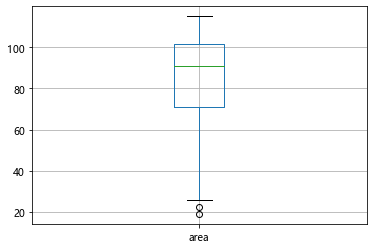

In [35]:
g.boxplot(column=['area'])
plt.show()

In [36]:
#定义基于3倍标准差原则的函数
def three_sigma(ser):
    
    mean_data=ser.mean()
    
    std_data=ser.mean()
    
    rule=(mean_data-3*std_data>ser)|(mean_data+3*std_data<ser)
    
    index=np.arange(ser.shape[0])[rule]
    
    outliers=ser.iloc[index]
    return outliers

In [37]:
three_sigma(g['area'])

Series([], Name: area, dtype: float64)

## regression

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [39]:
train_x, test_x, train_y, test_y = train_test_split(g['score'], g['area'], test_size=0.3)

In [40]:
x=sm.add_constant(g['score'])

In [41]:
results =sm.OLS(train_y,sm.add_constant(train_x)).fit()

In [42]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   area   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     64.81
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           2.20e-09
Time:                        04:09:01   Log-Likelihood:                -146.48
No. Observations:                  36   AIC:                             297.0
Df Residuals:                      34   BIC:                             300.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.2946      4.163     13.761      0.000      48.834      65.756
score         89.6474     11.136      8.051      0.000      67.017     112.277
==============================================================================
Omnibus:                       23.133   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.770
Skew:                          -1.885   Prob(JB):                     7.66e-08
Kurtosis:                       5.763   Cond. No.                         5.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

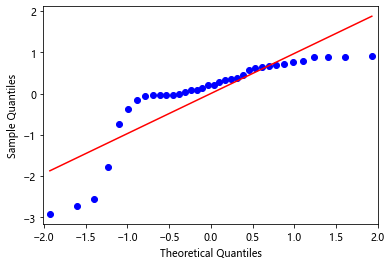

In [43]:
ax=sm.qqplot(results.resid_pearson,line='s')

## fit

In [44]:
p=pd.read_csv('foreign_score.csv')

In [45]:
dp=p[p['score']<0.35].copy()

In [46]:
_y=results.predict(sm.add_constant(dp['score']))

In [47]:
_y

20     86.707970
23     78.157153
34     84.893573
42     78.539685
64     88.253040
77     82.976790
78     86.901343
79     86.599224
80     79.787717
82     85.651687
83     83.584185
119    87.316297
124    83.999886
145    88.345093
179    79.568243
185    81.926782
189    85.558669
196    85.673396
201    81.079828
203    79.193706
210    86.063677
dtype: float64

In [48]:
tf=pd.DataFrame({'station':dp['STATION'],'area':g['area'].max()-_y})

In [49]:
tf

,station,area
20,CHOIBALSAN,28.392030
23,ALTAI,36.942847
34,UNDERKHAAN,30.206427
42,BAYANDELGER,36.560315
64,CHOIBALSAN,26.846960
77,BAYAN-OVOO,32.123210
78,UNDERKHAAN,28.198657
79,BARUUN-URT,28.500776
80,MATAD,35.312283
82,MANDALGOBI,29.448313


In [50]:
tf.to_csv('MG_area.csv')

In [51]:
tf.sort_values(by='area',ascending=False)

,station,area
23,ALTAI,36.942847
42,BAYANDELGER,36.560315
203,BAYAN DOBO SUMA,35.906294
179,BAYANBULAG,35.531757
80,MATAD,35.312283
201,MANDALGOBI,34.020172
185,BAYANHONGOR,33.173218
77,BAYAN-OVOO,32.123210
83,TSOGT-OVOO,31.515815
124,BAYANHONGOR,31.100114
